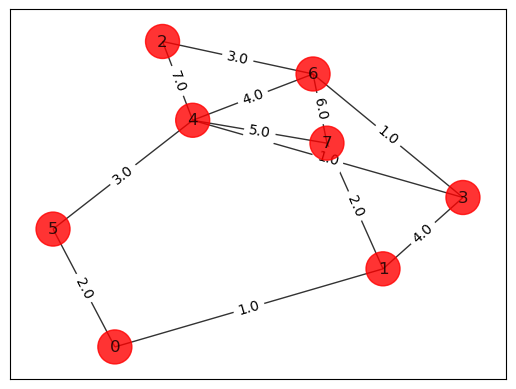

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

n = 8 # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 5, 2.0), (1, 3, 4.0), (1, 7, 2.0), (2, 4, 7.0), (2, 6, 3.0), (3, 4, 1.0), (3, 6, 1.0), 
        (4, 5, 3.0), (4, 6, 4.0), (4, 7, 5.0), (6, 7, 6.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

draw_graph(G, colors, pos)

In [2]:
# General imports
import numpy as np

# Pre-defined ansatz circuit, operator class and visualization tools
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_distribution

# IBM Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Estimator, Sampler, Session

# SciPy minimizer routine
from scipy.optimize import minimize

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

# For an IBM Quantum account.
ibm_quantum_service = QiskitRuntimeService(channel="ibm_quantum", token="47f7b78317fc7b376349905fbc7adc267a3d08f21767c3246d6187b700b41edb436ce8a073ecb304f1040f3dfd7e579ca0977a95d9f7759894f62dc0d7a63441")

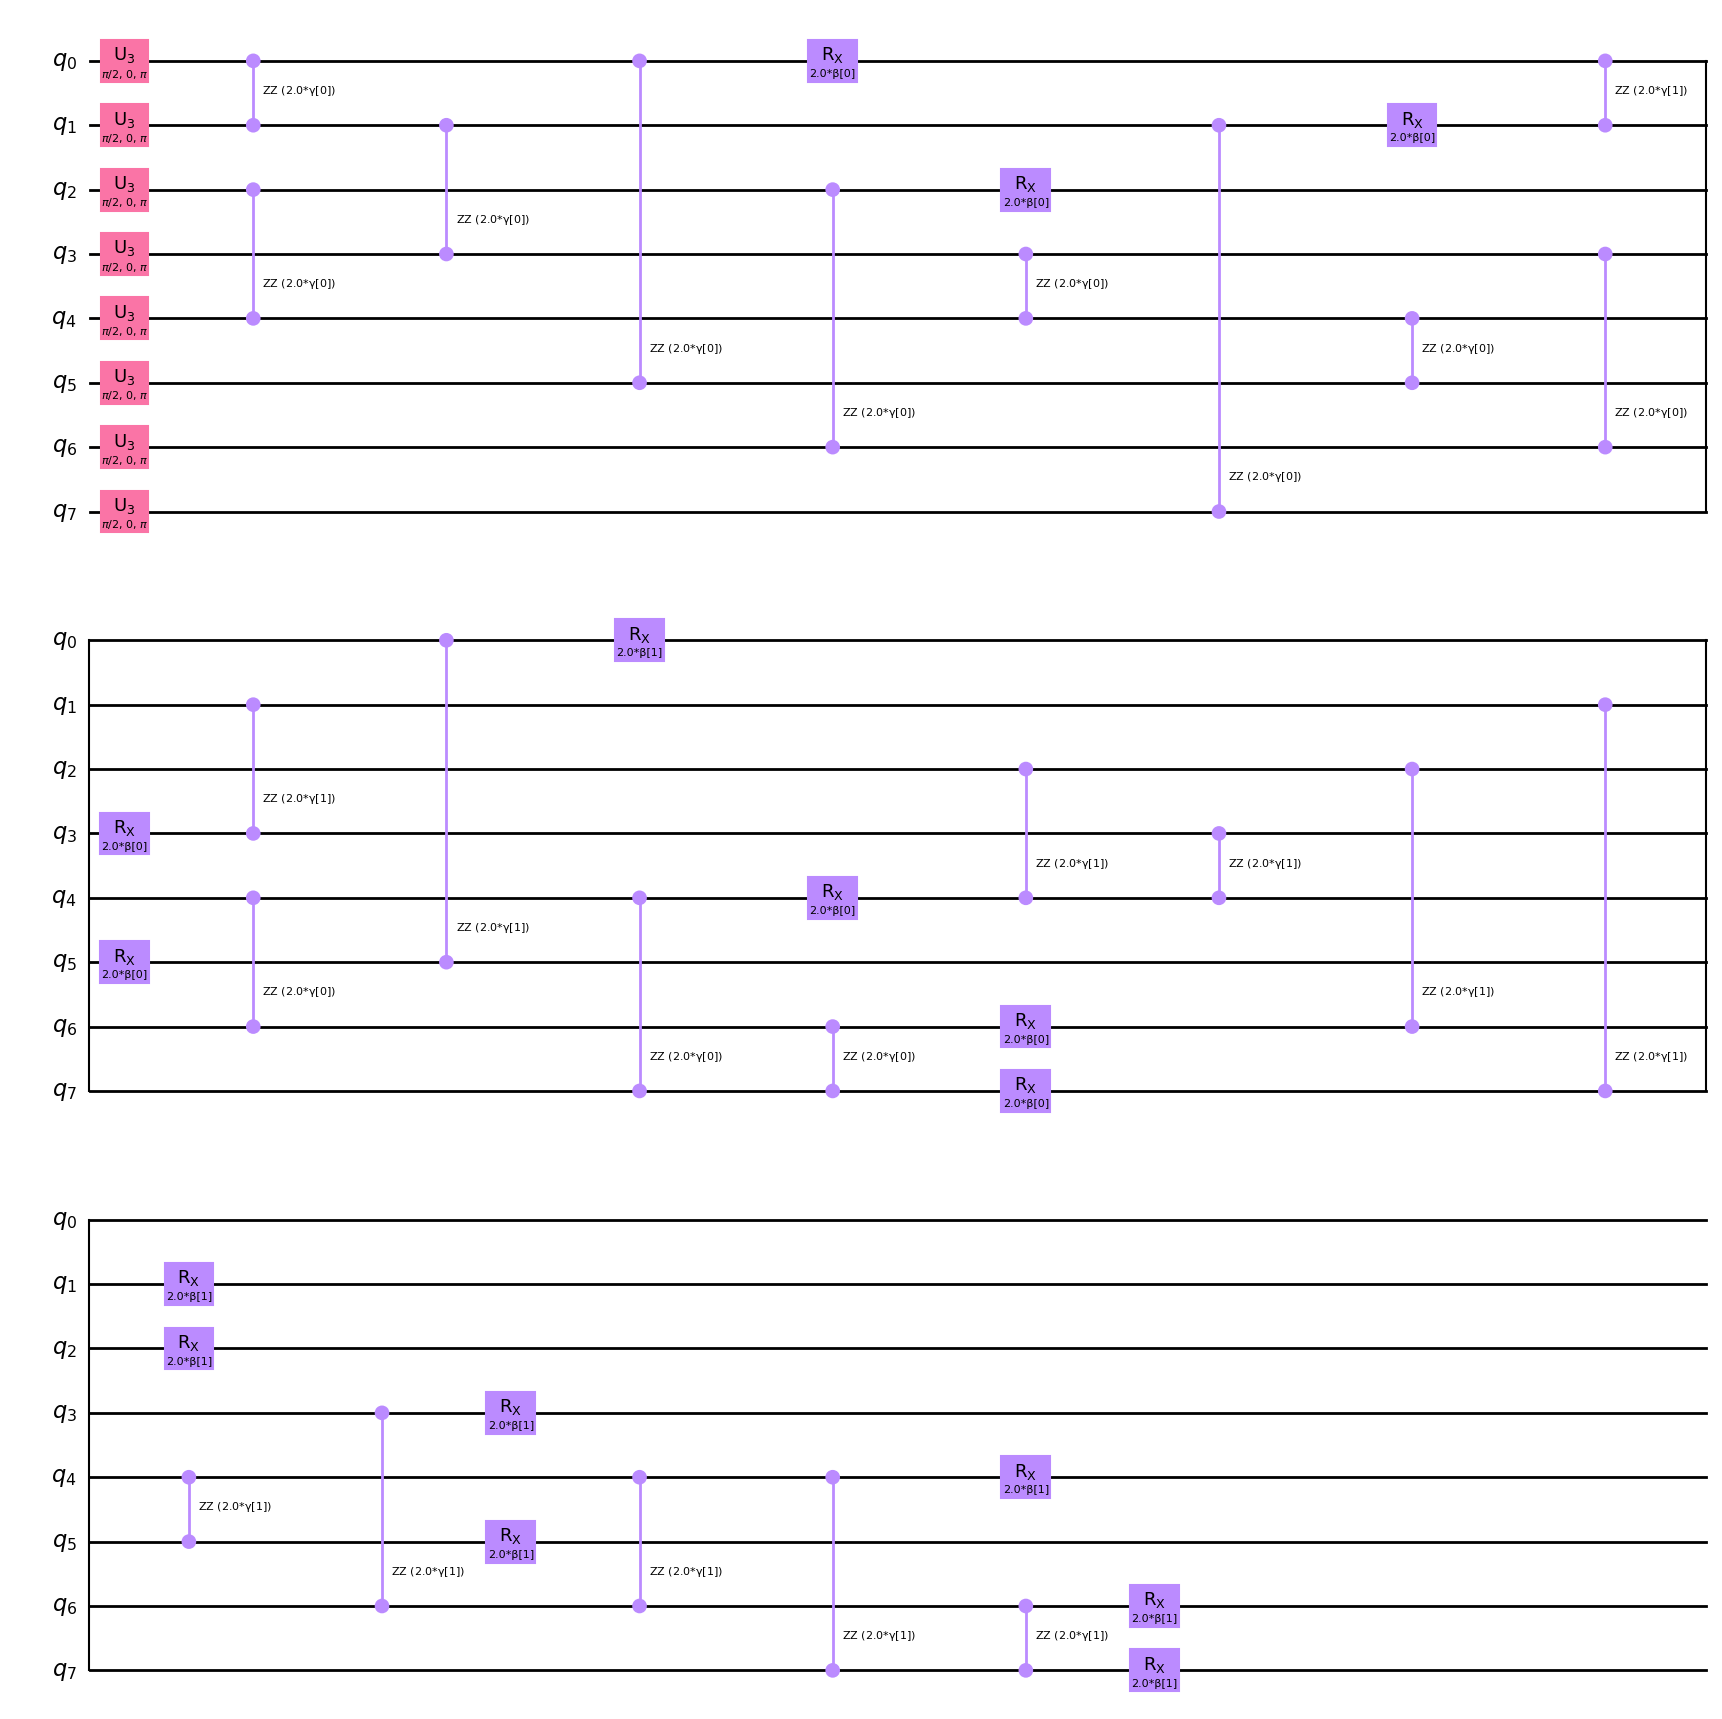

In [4]:
# Problem to Hamiltonian operator
hamiltonian = SparsePauliOp.from_list([("IIIIIIZZ", 1), ("IIZIIIIZ", 1), ("IIIIZIZI", 1), ("ZIIIIIZI", 1), ("IIIZIZII", 1), 
("IZIIIZII", 1), ("IIIZZIII", 1), ("IZIIZIII", 1), ("IIZZIIII", 1), ("IZIZIIII", 1), ("ZIIZIIII", 1), ("ZZIIIIII", 1)])
# elist = [(0, 1, 1.0), (0, 5, 2.0), (1, 3, 4.0), (1, 7, 2.0), (2, 4, 7.0), (2, 6, 3.0), (3, 4, 1.0), (3, 6, 1.0), 
#         (4, 5, 3.0), (4, 6, 4.0), (4, 7, 5.0), (6, 7, 6.0)]
# QAOA ansatz circuit
ansatz = QAOAAnsatz(hamiltonian, reps=2)
# Draw
ansatz.decompose(reps=3).draw("mpl")

In [11]:
# Select the simulator with the fewest number of jobs in the queue
# backend = ibm_quantum_service.least_busy(simulator=True, operational=True)
backend = ibm_quantum_service.get_backend("simulator_mps")

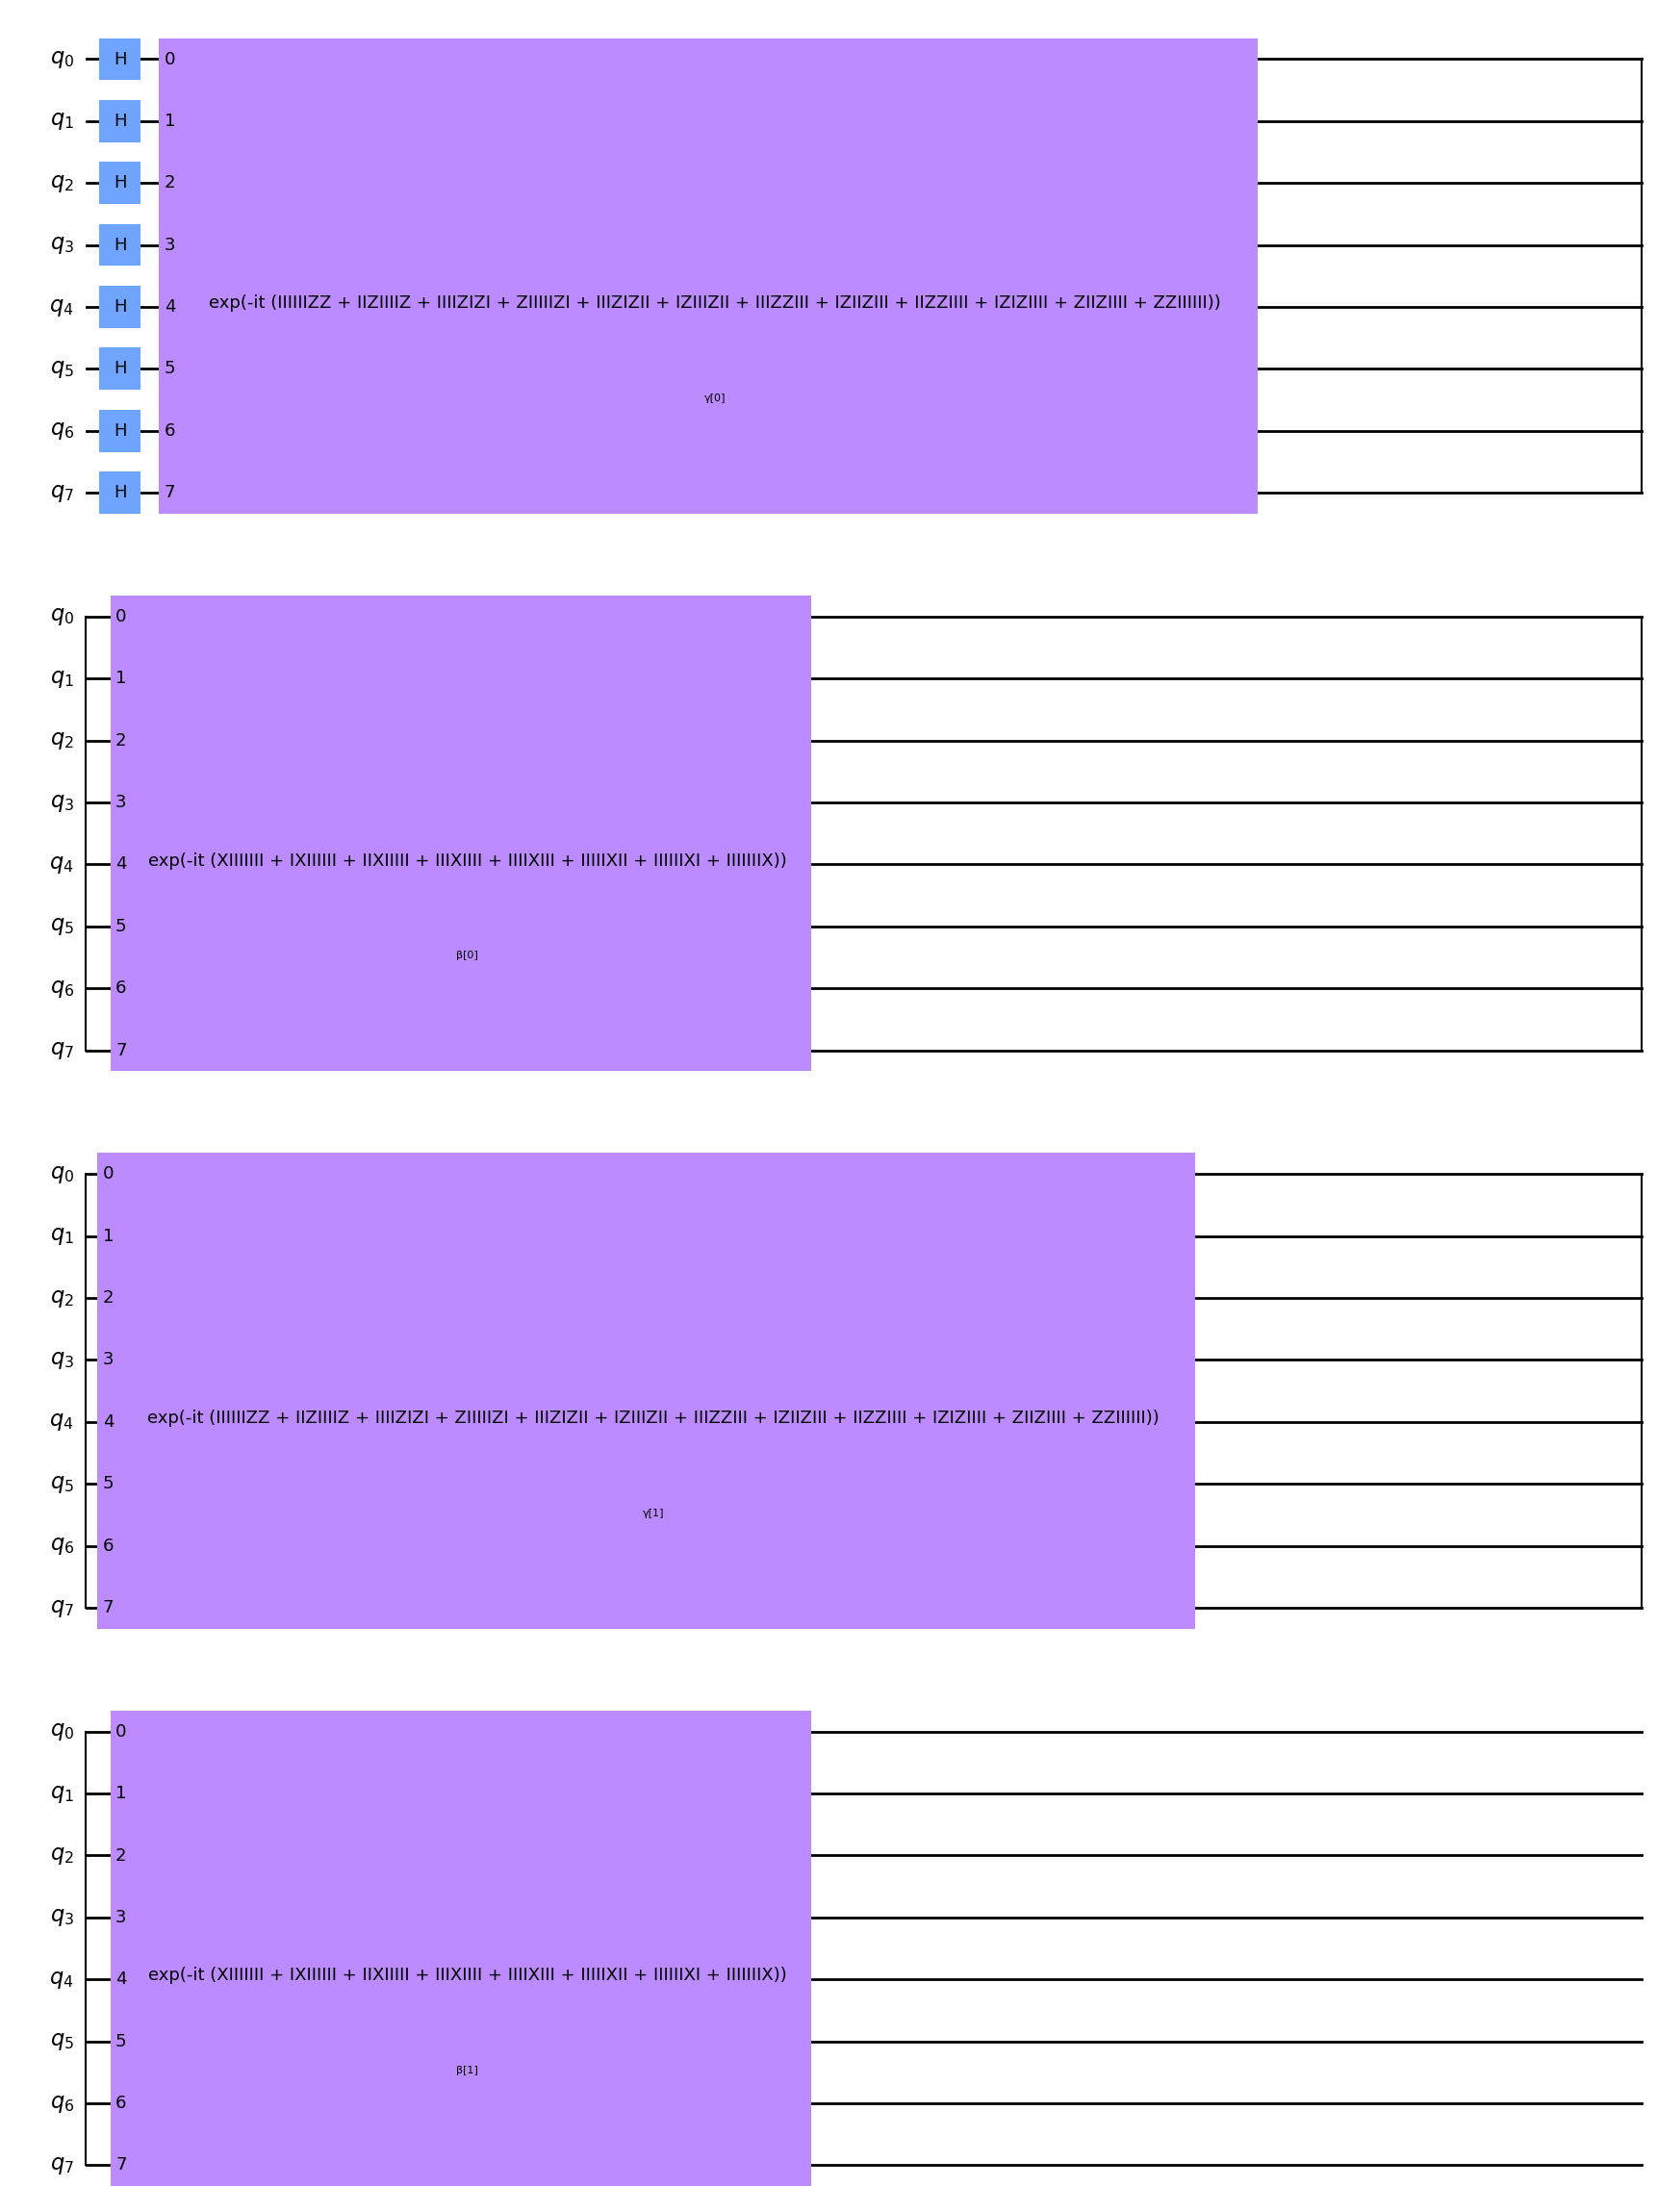

In [12]:
ansatz.decompose().draw("mpl")

In [13]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result().values[0]
    return cost

In [14]:
session = Session(backend=backend)

estimator = Estimator(session=session, options={"shots": int(1e4)})
sampler = Sampler(session=session, options={"shots": int(1e4)})

In [15]:
x0 = 2 * np.pi * np.random.rand(ansatz.num_parameters)

In [16]:
res = minimize(cost_func, x0, args=(ansatz, hamiltonian, estimator), method="COBYLA")

runtime_job._start_websocket_client:WARNING:2023-11-01 19:49:14,995: An error occurred while streaming results from the server for job cl13mafjcqd1hlctfbd0:
Traceback (most recent call last):
  File "d:\Learn\Environment\Anaconda\Lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 535, in _start_websocket_client
    self._ws_client.job_results()
  File "d:\Learn\Environment\Anaconda\Lib\site-packages\qiskit_ibm_provider\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "d:\Learn\Environment\Anaconda\Lib\site-packages\qiskit_ibm_provider\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_provider.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection. Error: Traceback (most recent call last):\n  File "d:\\Learn\\Environment\\Anaconda\\Lib\\site-packages\\websocket\\_app.py", line 418, in setSock\n    self.sock.co

KeyboardInterrupt: 

In [ ]:
res

In [ ]:
# Assign solution parameters to ansatz
qc = ansatz.assign_parameters(res.x)
# Add measurements to our circuit
qc.measure_all()